In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
try:
    df = pd.read_csv(r'C:\Users\Hxtreme.DESKTOP-JOS18IK.000\Downloads\Cost_of_Living_Index_2022.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Cost_of_Living_Index_2022.csv' not found. Please place it in the same directory.")
    exit()

Dataset loaded successfully.


In [3]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Afghanistan                 20.37        2.72   
1     2      Albania                 35.50        8.47   
2     3      Algeria                 26.87        4.59   
3     4    Argentina                 34.69        7.71   
4     5      Armenia                 33.89       11.61   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                           12.09            14.92                   12.41   
1                           22.83            29.32                   25.82   
2                           16.43            28.82                   14.48   
3                           22.04            28.17                   33.32   
4                           23.45            27.59                   30.55   

   Local Purchasing Power Index  
0                         23.04  
1                         30.19  
2                         24.63  
3               

In [4]:
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
df.info()


Dataset Shape: (139, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [5]:
print("\nMissing values check:")
print(df.isnull().sum())
print("No missing values found.")


Missing values check:
Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64
No missing values found.


In [6]:
print("\n--- Performing Exploratory Data Analysis (EDA) ---")


top_10_expensive = df.sort_values(by='Cost of Living Index', ascending=False).head(10)
bottom_10_expensive = df.sort_values(by='Cost of Living Index', ascending=True).head(10)


--- Performing Exploratory Data Analysis (EDA) ---


Text(0, 0.5, 'Country')

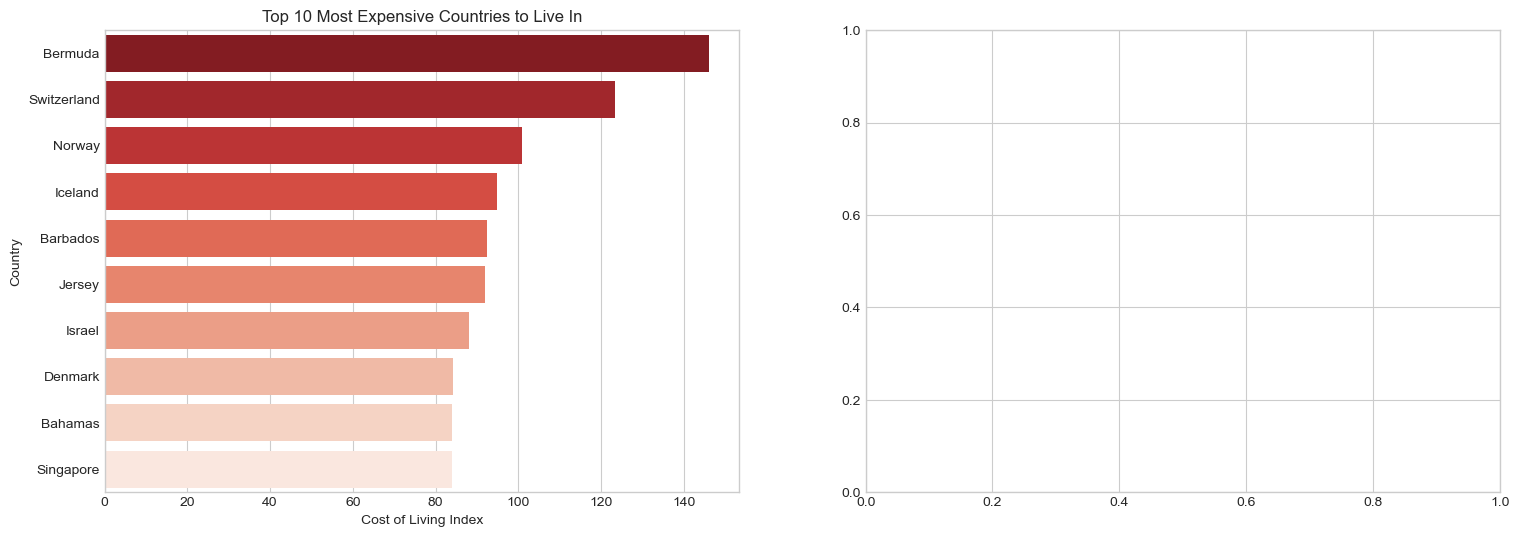

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


sns.barplot(x='Cost of Living Index', y='Country', data=top_10_expensive, ax=ax1, palette='Reds_r')
ax1.set_title('Top 10 Most Expensive Countries to Live In')
ax1.set_xlabel('Cost of Living Index')
ax1.set_ylabel('Country')

In [8]:
sns.barplot(x='Cost of Living Index', y='Country', data=bottom_10_expensive, ax=ax2, palette='Greens_r')
ax2.set_title('Top 10 Least Expensive Countries to Live In')
ax2.set_xlabel('Cost of Living Index')
ax2.set_ylabel('')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:
fig_map = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='Cost of Living Index',
                    hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Cost of Living Index by Country (2022)')

fig_map.write_html("cost_of_living_map.html")
print("Interactive map saved to 'cost_of_living_map.html'")

Interactive map saved to 'cost_of_living_map.html'


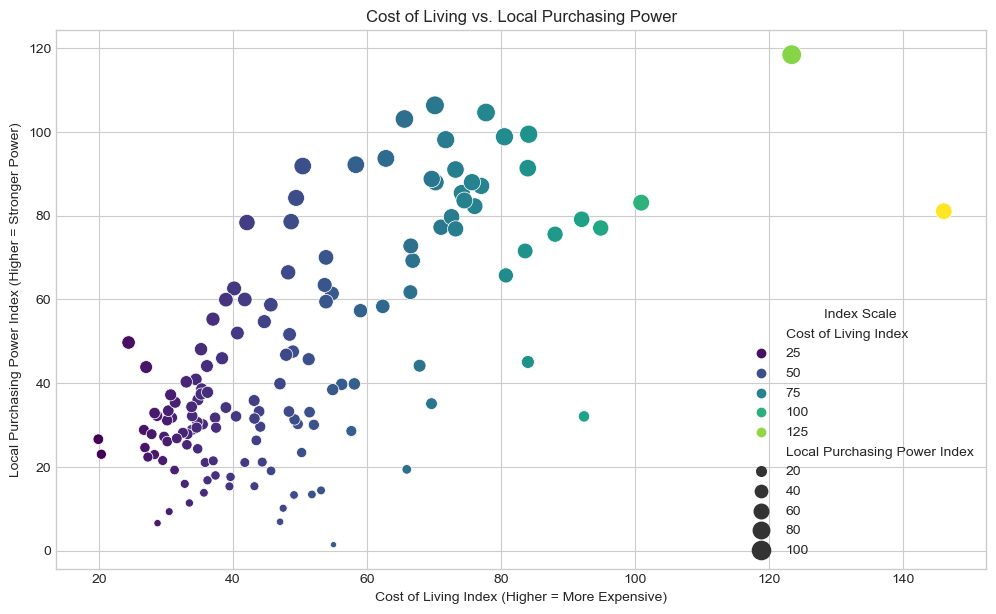

In [10]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Cost of Living Index', y='Local Purchasing Power Index', hue='Cost of Living Index', palette='viridis', size='Local Purchasing Power Index', sizes=(20, 200))
plt.title('Cost of Living vs. Local Purchasing Power')
plt.xlabel('Cost of Living Index (Higher = More Expensive)')
plt.ylabel('Local Purchasing Power Index (Higher = Stronger Power)')
plt.legend(title='Index Scale')
plt.show()

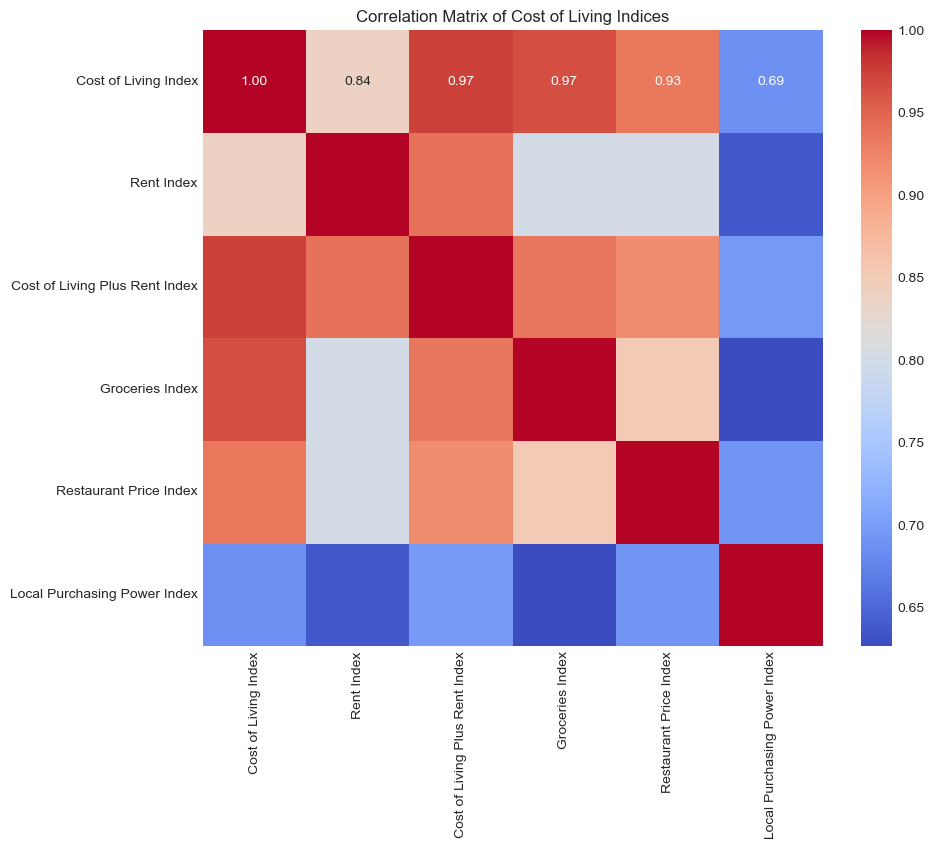

In [11]:
plt.figure(figsize=(10, 8))

correlation_matrix = df.drop(columns=['Rank', 'Country']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Cost of Living Indices')
plt.show()

In [12]:
print("1. Highest Cost of Living: Countries like Switzerland, Norway, and Singapore top the list of the most expensive places to live.")
print("2. Lowest Cost of Living: Countries in South Asia and North Africa, such as Pakistan, Afghanistan, and Algeria, have the lowest cost of living.")
print("3. Purchasing Power Insight: There isn't a simple inverse relationship between cost of living and purchasing power. Some expensive countries (e.g., Switzerland, Australia) also have very high local purchasing power, suggesting salaries are proportionately high. Conversely, some less expensive countries have very low purchasing power.")
print("4. Strong Correlations: 'Cost of Living Index' is very strongly correlated with 'Groceries Index' and 'Restaurant Price Index', which makes sense as these are major components of daily expenses.")


1. Highest Cost of Living: Countries like Switzerland, Norway, and Singapore top the list of the most expensive places to live.
2. Lowest Cost of Living: Countries in South Asia and North Africa, such as Pakistan, Afghanistan, and Algeria, have the lowest cost of living.
3. Purchasing Power Insight: There isn't a simple inverse relationship between cost of living and purchasing power. Some expensive countries (e.g., Switzerland, Australia) also have very high local purchasing power, suggesting salaries are proportionately high. Conversely, some less expensive countries have very low purchasing power.
4. Strong Correlations: 'Cost of Living Index' is very strongly correlated with 'Groceries Index' and 'Restaurant Price Index', which makes sense as these are major components of daily expenses.
